In [6]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas packages

import numpy as np
import pandas as pd

# Read the csv file using 'read_csv'

DataA = pd.read_csv('Data 1a State-wise Gross Domestic Product (GDP) at current price on yearly basis.csv')
print(DataA)

                    Items  Description Duration  Andhra Pradesh   \
0   GSDP - CURRENT PRICES (` in Crore)  2011-12        379402.00   
1   GSDP - CURRENT PRICES (` in Crore)  2012-13        411404.00   
2   GSDP - CURRENT PRICES (` in Crore)  2013-14        464272.00   
3   GSDP - CURRENT PRICES (` in Crore)  2014-15        526468.00   
4   GSDP - CURRENT PRICES (` in Crore)  2015-16        609934.00   
5   GSDP - CURRENT PRICES (` in Crore)  2016-17        699307.00   
6        (% Growth over previous year)  2012-13             8.43   
7        (% Growth over previous year)  2013-14            12.85   
8        (% Growth over previous year)  2014-15            13.40   
9        (% Growth over previous year)  2015-16            15.85   
10       (% Growth over previous year)  2016-17            14.65   

    Arunachal Pradesh      Assam      Bihar  Chhattisgarh       Goa  \
0            11063.00  143175.00  247144.00     158074.00  42367.00   
1            12547.00  156864.00  282368.

In [4]:
# Remove the rows for which : '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17

In [33]:
DataA.columns = [c.replace(' ', '_') for c in DataA.columns] # replacing column spaces with '_' for easy access
indexNames = DataA.index[((DataA['Items__Description']=='(% Growth over previous year)') & (DataA['Duration']=='2016-17'))]
DataA = DataA.drop(indexNames)

indexNames = DataA.index[((DataA['Items__Description']=='GSDP - CURRENT PRICES (` in Crore)') & (DataA['Duration']=='2016-17'))]
DataA = DataA.drop(indexNames)
print(DataA)

                   Items__Description Duration  Andhra_Pradesh_  \
0  GSDP - CURRENT PRICES (` in Crore)  2011-12        379402.00   
1  GSDP - CURRENT PRICES (` in Crore)  2012-13        411404.00   
2  GSDP - CURRENT PRICES (` in Crore)  2013-14        464272.00   
3  GSDP - CURRENT PRICES (` in Crore)  2014-15        526468.00   
4  GSDP - CURRENT PRICES (` in Crore)  2015-16        609934.00   
6       (% Growth over previous year)  2012-13             8.43   
7       (% Growth over previous year)  2013-14            12.85   
8       (% Growth over previous year)  2014-15            13.40   
9       (% Growth over previous year)  2015-16            15.85   

   Arunachal_Pradesh      Assam      Bihar  Chhattisgarh       Goa    Gujarat  \
0           11063.00  143175.00  247144.00     158074.00  42367.00  615606.00   
1           12547.00  156864.00  282368.00     177511.00  38120.00  724495.00   
2           14602.00  177745.00  317101.00     206690.00  35921.00  807623.00   
3    

In [55]:
#Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'. 

In [45]:
Avg_growth_rate_states = DataA.loc[(DataA.Items__Description == "(% Growth over previous year)")&(DataA.Duration != '2011-12')&(DataA.Duration != '2012-13')].mean(axis=0)

In [35]:
# Dropping All_India_GDP column since we are concentrating only on States and at same time removing null valued fields.
Avg_growth_rate_transformd = Avg_grw_rate_states.drop(["All_India_GDP"]).dropna() 

# Comparison chart for all states for average growth of states in percentage

Avg_growth_rate_transformd

Andhra_Pradesh_              14.033333
Arunachal_Pradesh            14.413333
Assam                        12.650000
Bihar                        13.603333
Chhattisgarh                 13.703333
Goa                           6.033333
Gujarat                      11.126667
Haryana                      11.846667
Himachal_Pradesh             12.280000
Jammu_&_Kashmir              10.900000
Jharkhand                    11.500000
Karnataka                    14.120000
Kerala                       12.583333
Madhya_Pradesh               12.626667
Maharashtra                  11.260000
Manipur                      14.610000
Meghalaya                     6.953333
Mizoram                      17.700000
Nagaland                     16.415000
Odisha                        9.836667
Punjab                       11.185000
Rajasthan                    11.320000
Sikkim                       10.486667
Tamil_Nadu                   12.336667
Telangana                    12.763333
Tripura                  

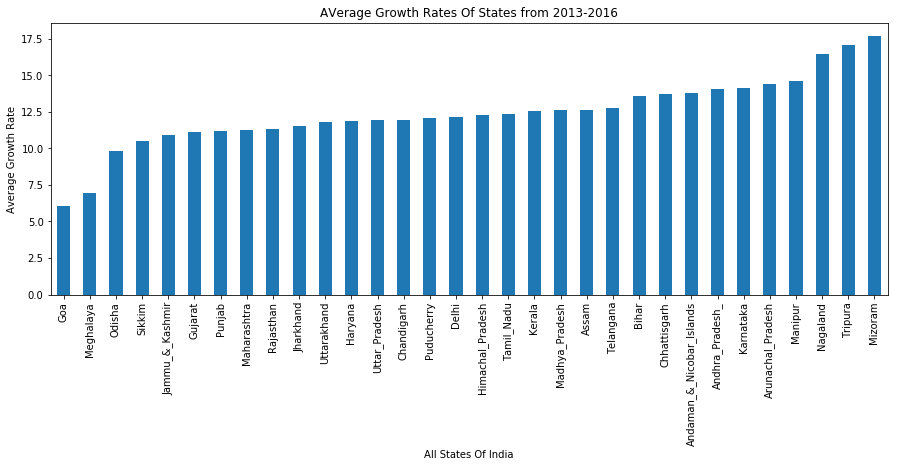

In [38]:
# Plotting the calcualted (average growth of states in percentage) value to the states in Increasing order.

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

Avg_growth_rate_transformd.sort_values().plot(kind='bar')

plt.ylabel('Average Growth Rate')

plt.xlabel('All States Of India')

plt.title('AVerage Growth Rates Of States from 2013-2016')

plt.show()

In [39]:
#Which states have been growing consistently fast, and which ones have been struggling?
#From the above bar grap-

#The states that are growing fast are: Arunachal pradesh, Manipur, Nagaland, Tripura and Mizoram

#The States that are struggling in their growth are: Goa, Meghalaya, Odisha, Sikkim and Jammu & Kashmir.

In [47]:
#Curiosity exercise: What has been the average growth rate of your home state, and how does it compare to the national average over this duration?
#Average growth rate of my home state (Maharashtra) over the period 2013-2016 is as below:

Avg_growth_rate_states['Maharashtra']
Avg_growth_rate_states['Maharashtra']/Avg_growth_rate_states['All_India_GDP']
#Average growth rate is 1.006% more than National Growth rate

1.005058018446891

In [48]:
#Plot the total GDP of the states for the year 2015-16:

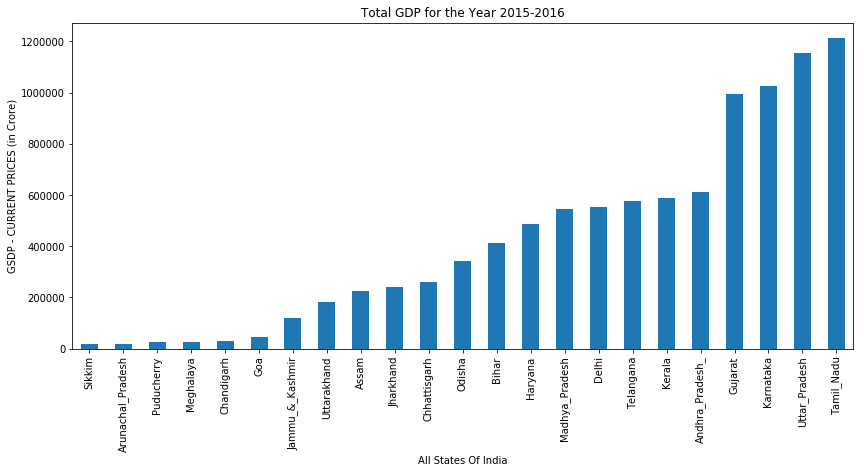

In [49]:
plt.figure(figsize=(14,6))

# In the below line of Code, First, we are selecting the required rows using:[(DataA.Items__Description == "GSDP - CURRENT PRICES (` in Crore)")&(DataA.Duration == '2015-16')]

# Second, we are selecting the required columns (using: iloc[:,2:-1]), by removing the columns: (Items__Description, Duration) and keeping only the states.

# Third, we are transposing the dataframe for the benefit of plotting, insted of keeping it as a single row dataframe. Transposing will automatically convert columns into index.

# Fourth, converting the entire dataframe into a series by selecting the last column using: iloc[:,-1], this will give clean plotting.

# Fifth, sorting the values (using: sort_values()) so that while plotting the graph it will be in order.

# Sixth, dropping all states that are havong null values (using: dropna())

# Seventh, plotting the bar graph using: plot(kind='bar'), this will take the give series into y-axis and its index as x-axis.

DataA.loc[(DataA.Items__Description == "GSDP - CURRENT PRICES (` in Crore)")&(DataA.Duration == '2015-16')].iloc[:,2:-1].T.iloc[:,-1].sort_values().dropna().plot(kind='bar') 

plt.ylabel('GSDP - CURRENT PRICES (in Crore)')

plt.xlabel('All States Of India')

plt.title('Total GDP for the Year 2015-2016')

plt.show()

In [50]:
#Top 5 states based on total GSD as per the above plot are: Tamil Nadu, Uttar_Pradesh, Karnataka, Gujarat, Andhra_pradesh

#Bottom 5 stated based on the total GSD are as follows: Sikkim, Arunachal_pradesh, Puduchery, Meghalaya and Chandigarh

In [8]:
#Part 1b
import glob, os   
import pandas.io.common
import pandas as pd

# Reading all the states csv files and creating an array with the file names.

# get data file names
file_paths = glob.glob("Data 1b" + "/*.csv")


# We are performing the analysis only for the duration : 2014-15 as requested in step 1

req_columns = ['S.No.','Item','2014-15'] 

# We are not taking the union territories while creating the data frame 

# Creating a single dataframe (df_all_states) by merging all CSV files and creating a new column State, as per the order of below steps. 

# First, read the csv files using: pd.read_csv(i, encoding = 'ISO8859', usecols=req_columns), ISO encoding is used since unicode encoding is not reading the white spaces properly, throwing errors.

# Second, creating a new column 'State' using: assign(State = i.split('-')[2].replace('_',' '), we are splitting the file name and getting the column name from it.

# Third, we are replacing the column names from 'Tamil_Nadu' to 'Tamil Nadu' using: replace('_',' ')

# Fourth, we are using the variables req_columns and union_terr respectively, to use on the required columns and remove union territories.

df_all_states = pd.concat([pd.read_csv(i, encoding = 'ISO8859', usecols=req_columns).assign(State = i.split('-')[1].replace('_',' ')) 
                for i in file_paths if i.split('-')[2].replace('_',' ')])

df_all_states # This dataframe has all datas merged from all CSV files plus a new column state to represent its respective states.

,S.No.,Item,2014-15,State
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra Pradesh
1,1.1,Crops,7893514.0,Andhra Pradesh
2,1.2,Livestock,4309078.0,Andhra Pradesh
3,1.3,Forestry and logging,346160.0,Andhra Pradesh
4,1.4,Fishing and aquaculture,2270664.0,Andhra Pradesh
5,2,Mining and quarrying,1484300.0,Andhra Pradesh
6,Total,Primary,16303716.0,Andhra Pradesh
7,3,Manufacturing,4672266.0,Andhra Pradesh
8,4,"Electricity, gas, water supply & other utility...",1151729.0,Andhra Pradesh
9,5,Construction,4664889.0,Andhra Pradesh


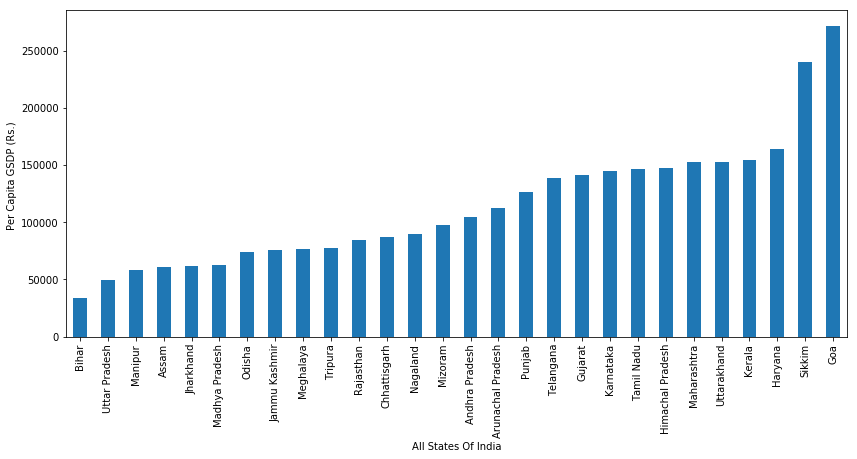

In [60]:
#Plot the GDP per capita for all the states
plt.figure(figsize=(14,6))

# From the below code, first, selecting the necessary rows using: loc[(df_all_states.Item == "Per Capita GSDP (Rs.)")]

# Second, selecting the necassry columns: State and 2014-15 using: iloc[:,2:]  

# Third, we are sorting the values using: sort_values(by = '2014-15'), so that it will be in order while plotting.

# Fouth, we are setting the index of this dataframe as 'State' column.

# Fifth, converting the dataframe into series, which will be helpful for clean plotting.

# Sixth, plotting the graph using: plot(kind='bar'), this will take y-axis as given series and its index (State) as x-axis.

df_all_states.loc[(df_all_states.Item == "Per Capita GSDP (Rs.)")].iloc[:,2:].sort_values(by = '2014-15').set_index('State').iloc[:,-1].plot(kind='bar')

plt.ylabel('Per Capita GSDP (Rs.) ')

plt.xlabel('All States Of India')

plt.show()


In [61]:
#Based on GDP per capita from above plot:

#Top-5 states are: Goa, Sikkim, Haryana, Kerala, Uttarakhand
#Bottom-5 states are: Bihar, Uttar pradesh, Manipur, Assam, Jharkhand
#Based on above plot highest per capita state is Goa and the lowest is Bihar, their ratio is as follows:

In [62]:
df_all_states.loc[(df_all_states.State == "Goa")&(df_all_states.Item == "Per Capita GSDP (Rs.)")].iloc[:,-2].T[32] / df_all_states.loc[(df_all_states.State == "Bihar")&(df_all_states.Item == "Per Capita GSDP (Rs.)")].iloc[:,-2].T[32]

8.004741709371503

In [63]:
#Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

# Selecting required rows and columns using: loc[(df_all_states.Item == "Gross State Domestic Product")][['2014-15','State']]

# Renaming the column for convenience.

df_total_GDP = df_all_states.loc[(df_all_states.Item == "Gross State Domestic Product")][['2014-15','State']].rename(columns={'2014-15':'GSDP'})

df_total_GDP.head() 

,GSDP,State
30,52646842.0,Andhra Pradesh
30,1676119.0,Arunachal Pradesh
30,19809800.0,Assam
30,37391988.0,Bihar
30,23498180.0,Chhattisgarh


In [64]:
df_prim_sec_ter = df_all_states.loc[(df_all_states.Item == "Primary")][['2014-15','State']].rename(columns={'2014-15':'Primary_GSVA'}) # same as above

# Merging primary and seconday using state as common column

df_prim_sec_ter = pd.merge(df_prim_sec_ter, df_all_states.loc[(df_all_states.Item == "Secondary")][['2014-15','State']], how = 'inner', on = 'State').rename(columns={'2014-15':'Secondary_GSVA'})

# Merging primary, seconday and tertiary using state as common column

df_prim_sec_ter = pd.merge(df_prim_sec_ter, df_all_states.loc[(df_all_states.Item == "Tertiary")][['2014-15','State']], how = 'inner', on = 'State').rename(columns={'2014-15':'Tertiary_GSVA'})

df_prim_sec_ter.head()

,Primary_GSVA,State,Secondary_GSVA,Tertiary_GSVA
0,16303716.0,Andhra Pradesh,10488884.0,22032942.0
1,716959.0,Arunachal Pradesh,287489.0,631844.0
2,5326697.0,Assam,4033091.0,9307109.0
3,8019997.0,Bihar,5984896.0,22179969.0
4,6400817.0,Chhattisgarh,8238886.0,7588778.0


In [65]:
# Merging the dataframes: df_prim_sec_ter, df_total_GDP to get the result as shown in below table.

df_total_GDP_pri_sec_ter = pd.merge(df_prim_sec_ter, df_total_GDP, how = 'inner', on = 'State')

df_total_GDP_pri_sec_ter.head()

,Primary_GSVA,State,Secondary_GSVA,Tertiary_GSVA,GSDP
0,16303716.0,Andhra Pradesh,10488884.0,22032942.0,52646842.0
1,716959.0,Arunachal Pradesh,287489.0,631844.0,1676119.0
2,5326697.0,Assam,4033091.0,9307109.0,19809800.0
3,8019997.0,Bihar,5984896.0,22179969.0,37391988.0
4,6400817.0,Chhattisgarh,8238886.0,7588778.0,23498180.0


In [66]:
# Creting a new column to calculate the percentage contribution of primary

df_total_GDP_pri_sec_ter['%_Primary_Contribution'] = (df_total_GDP_pri_sec_ter['Primary_GSVA']/df_total_GDP_pri_sec_ter['GSDP'])*100

# Creting a new column to calculate the percentage contribution of Secondary

df_total_GDP_pri_sec_ter['%_Secondary_Contribution'] = (df_total_GDP_pri_sec_ter['Secondary_GSVA']/df_total_GDP_pri_sec_ter['GSDP'])*100

# Creting a new column to calculate the percentage contribution of Tertiary

df_total_GDP_pri_sec_ter['%_Tertiary_Contribution'] = (df_total_GDP_pri_sec_ter['Tertiary_GSVA']/df_total_GDP_pri_sec_ter['GSDP'])*100

# Creting a new column to calculate the percentage contribution of all sectors

df_total_GDP_pri_sec_ter['Total_pri_sec_tri_%'] = df_total_GDP_pri_sec_ter['%_Primary_Contribution']+df_total_GDP_pri_sec_ter['%_Secondary_Contribution']+df_total_GDP_pri_sec_ter['%_Tertiary_Contribution']

# Sorting the dataframe to keep it in order.

df_total_GDP_pri_sec_ter = df_total_GDP_pri_sec_ter.sort_values(by='Total_pri_sec_tri_%',ascending=False)

df_total_GDP_pri_sec_ter.head()

,Primary_GSVA,State,Secondary_GSVA,Tertiary_GSVA,GSDP,%_Primary_Contribution,%_Secondary_Contribution,%_Tertiary_Contribution,Total_pri_sec_tri_%
18,616178.0,Nagaland,212361.0,992956.0,1841424.0,33.462038,11.532434,53.923268,98.917740
15,383140.0,Manipur,220173.0,1177334.0,1804276.0,21.235110,12.202845,65.252434,98.690389
25,942216.0,Tripura,484393.0,1484709.0,2966662.0,31.760140,16.327880,50.046450,98.134469
17,225598.0,Mizoram,270072.0,637619.0,1155933.0,19.516529,23.363984,55.160550,98.041063
1,716959.0,Arunachal Pradesh,287489.0,631844.0,1676119.0,42.774946,17.152064,37.696846,97.623856


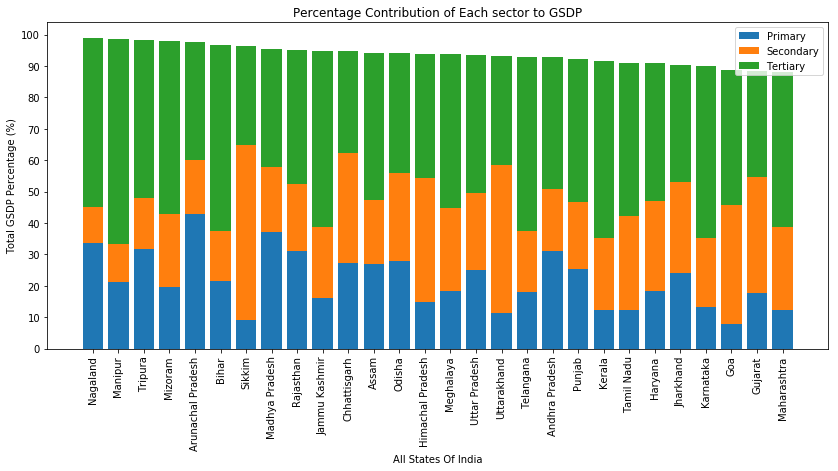

In [67]:
# Plotting a Stacke bar-chart to represent the percentage contribution of primary, secondary and tertiary sectors as a percentage of total GDP for all the states.

import numpy as np

Primary = df_total_GDP_pri_sec_ter['%_Primary_Contribution']

Secondary = df_total_GDP_pri_sec_ter['%_Secondary_Contribution']

Tertiary = df_total_GDP_pri_sec_ter['%_Tertiary_Contribution']

States = df_total_GDP_pri_sec_ter['State']   # the x locations for the groups

plt.figure(figsize=(14,6))

p1 = plt.bar(States, Primary)

p2 = plt.bar(States, Secondary, bottom=Primary)

p3 = plt.bar(States, Tertiary, bottom=np.array(Primary)+np.array(Secondary))

plt.ylabel('Total GSDP Percentage (%)')

plt.title('Percentage Contribution of Each sector to GSDP')

plt.xticks(States,rotation=90)

plt.yticks(np.arange(0, 110, 10)); plt.xlabel('All States Of India')

plt.legend((p1[0], p2[0], p3[0]), ('Primary', 'Secondary', 'Tertiary'))

plt.show()

In [68]:
# Creating a dataframe by selecting necessay column from df_all_states using: loc[df_all_states.Item=='Per Capita GSDP (Rs.)'] and renaming the columns for convenince using: rename(columns = {'2014-15':'per_capita_GSDP'}

states_per_capita_sorted = df_all_states.loc[df_all_states.Item=='Per Capita GSDP (Rs.)'].sort_values(by='2014-15')[['2014-15','State']].rename(columns = {'2014-15':'per_capita_GSDP'})

states_per_capita_sorted.head()

,per_capita_GSDP,State
32,33954.0,Bihar
32,49450.0,Uttar Pradesh
32,58442.0,Manipur
32,60621.0,Assam
32,62091.0,Jharkhand


In [69]:
# Creating the categories C1, C2, C3, C4

q1 = round(27*0.20) # total sttes count in the given dataset is 27.

q2 = round(27*0.5)

q3 = round(27*0.85)

q4 = round(27*1)

c4 = states_per_capita_sorted.iloc[:q1,:]

c3 = states_per_capita_sorted.iloc[q1:q2,:]

c2 = states_per_capita_sorted.iloc[q2:q3,:]

c1 = states_per_capita_sorted.iloc[q3:q4,:]

In [70]:
c4 # States within the percentile 0-20 as per 'per_capita_GSDP'

,per_capita_GSDP,State
32,33954.0,Bihar
32,49450.0,Uttar Pradesh
32,58442.0,Manipur
32,60621.0,Assam
32,62091.0,Jharkhand


In [71]:
c3 # States within the percentile 20-50 as per 'per_capita_GSDP'

,per_capita_GSDP,State
32,62989.0,Madhya Pradesh
32,73979.0,Odisha
32,75840.0,Jammu Kashmir
32,76228.0,Meghalaya
32,77358.0,Tripura
32,84837.0,Rajasthan
32,86860.0,Chhattisgarh
32,89607.0,Nagaland
32,97687.0,Mizoram


In [72]:
c2 # States within the percentile 50-85 as per 'per_capita_GSDP'

,per_capita_GSDP,State
32,104977.0,Andhra Pradesh
32,112718.0,Arunachal Pradesh
32,126606.0,Punjab
32,139035.0,Telangana
32,141263.0,Gujarat
32,145141.0,Karnataka
32,146503.0,Tamil Nadu
32,147330.0,Himachal Pradesh
32,152853.0,Maharashtra


In [73]:
c1 # States within the percentile 85-100 as per 'per_capita_GSDP'

,per_capita_GSDP,State
32,153076.0,Uttarakhand
32,154778.0,Kerala
32,164077.0,Haryana
32,240274.0,Sikkim


In [74]:
# Get all the fields that belong to the c1 states

df_C1 = df_all_states.loc[df_all_states.State.isin(c1.State)&(df_all_states['S.No.']!='Total')&
        (~df_all_states['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]

# Keeping only the necessary fields and grouping and sorting as required

df_C1 = df_C1[['Item','2014-15']].groupby(by='Item').sum().sort_values(by='2014-15',ascending=False).reset_index()

# Creating a new column Percentage_of_GSDP for easy analysis

df_C1['%_of_GSDP_Contribution'] = df_C1['2014-15']/(df_C1['2014-15'][0])*100 # here index index 0 has GSDP since we have sorted in descending order

# Finding which are the Sub-sectors that contribute approximately 80% to the GSDP (It should be 3 or more)

start =1; End = 4 # Takinfg first top 3 sectors initially to check whether it contributes approximately 80%. Starting with 1 to avoid first row which is GSDP

while df_C1.iloc[start:End ,-1].sum() <= 78: #considering anything less than or equal to 78% does not contribute 80% approximately, only equal to greater than 79% does.
    End = End+1
    
# Contribution of subsectors approximately 80% For category C1 to the total GSDP are as follows

C1_Sub_Sectors_contributes_80_percent_apprx = df_C1[['Item','%_of_GSDP_Contribution']].iloc[start:End].append({'Item':'ABOVE C1 SUB-SECTORS EXACT CONTRIBUTION =','%_of_GSDP_Contribution':round(df_C1.iloc[start:End ,-1].sum(),2)},ignore_index=True).rename(columns={'Item':'C1_Sub_Sectors_that_contributes_80%_approximately_to_GSDP_in_Total'})

C1_Sub_Sectors_contributes_80_percent_apprx

,C1_Sub_Sectors_that_contributes_80%_approximately_to_GSDP_in_Total,%_of_GSDP_Contribution
0,Manufacturing,16.172614
1,"Agriculture, forestry and fishing",13.750582
2,"Trade, repair, hotels and restaurants",13.463566
3,"Real estate, ownership of dwelling & professio...",13.294467
4,Construction,10.907173
5,Other services,7.769124
6,Crops,7.616859
7,ABOVE C1 SUB-SECTORS EXACT CONTRIBUTION =,82.970000


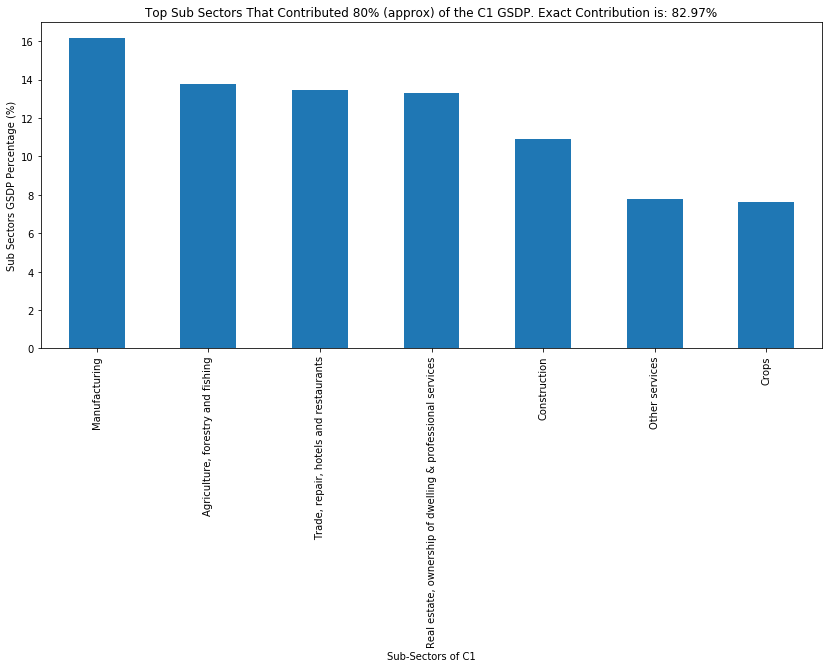

In [80]:
plt.figure(figsize=(14,6))

# Selecting the required rows and columns using: iloc[:-1,:]['%_of_GSDP_Contribution'] and plotting the graph using: plot(kind='bar')

C1_Sub_Sectors_contributes_80_percent_apprx.set_index("C1_Sub_Sectors_that_contributes_80%_approximately_to_GSDP_in_Total").iloc[:-1,:]['%_of_GSDP_Contribution'].plot(kind='bar')

plt.ylabel('Sub Sectors GSDP Percentage (%)')
plt.xlabel('Sub-Sectors of C1')

plt.title('Top Sub Sectors That Contributed 80% (approx) of the C1 GSDP. Exact Contribution is: {0}%'.format(C1_Sub_Sectors_contributes_80_percent_apprx.iloc[-1:,-1:].values[0][0]))

plt.show()

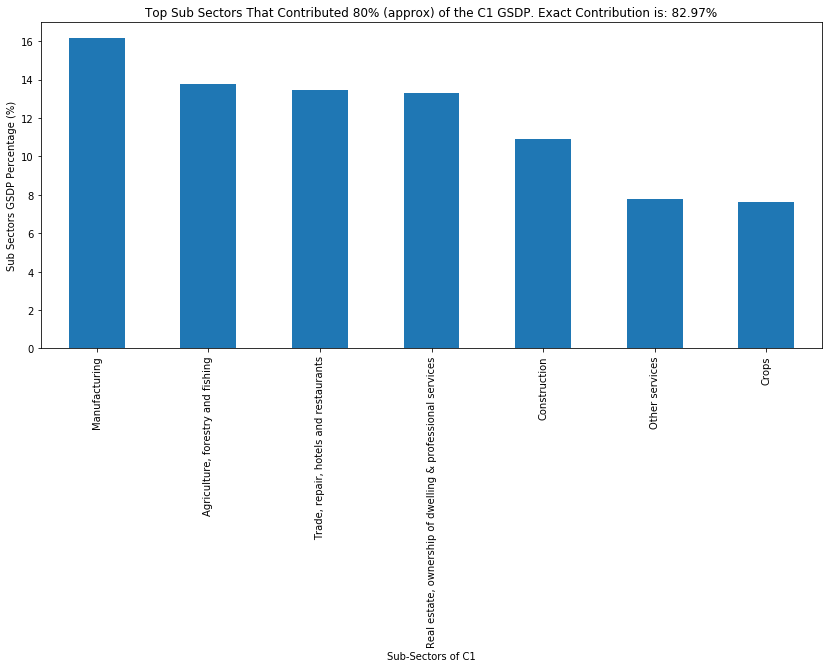

In [81]:
plt.figure(figsize=(14,6))

# Selecting the required rows and columns using: iloc[:-1,:]['%_of_GSDP_Contribution'] and plotting the graph using: plot(kind='bar')

C1_Sub_Sectors_contributes_80_percent_apprx.set_index("C1_Sub_Sectors_that_contributes_80%_approximately_to_GSDP_in_Total").iloc[:-1,:]['%_of_GSDP_Contribution'].plot(kind='bar')

plt.ylabel('Sub Sectors GSDP Percentage (%)')
plt.xlabel('Sub-Sectors of C1')

plt.title('Top Sub Sectors That Contributed 80% (approx) of the C1 GSDP. Exact Contribution is: {0}%'.format(C1_Sub_Sectors_contributes_80_percent_apprx.iloc[-1:,-1:].values[0][0]))

plt.show()

In [83]:
# Get all the fields that belong to the c2 states

df_C2 = df_all_states.loc[df_all_states.State.isin(c2.State)&(df_all_states['S.No.']!='Total')&
        (~df_all_states['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]

# Keeping only the necessary fields and grouping and sorting as required

df_C2 = df_C2[['Item','2014-15']].groupby(by='Item').sum().sort_values(by='2014-15',ascending=False).reset_index()

# Creating a new column Percentage_of_GSDP for easy analysis

df_C2['%_of_GSDP_Contribution'] = df_C2['2014-15']/(df_C2['2014-15'][0])*100 # here index index 0 has GSDP since we have sorted in descending order

# Finding which are the Sub-sectors that contribute approximately 80% to the GSDP (It should be 3 or more)

start =1; End = 4 # Takinfg first top 3 sectors initially to check whether it contributes approximately 80%. Starting with 1 to avoid first row which is GSDP

while df_C2.iloc[start:End ,-1].sum() <= 78: #considering anything less than or equal to 78% does not contribute 80% approximately, only equal to greater than 79% does.
    End = End+1
    
# Contribution of subsectors approximately 80% For category C2 to the total GSDP are as follows

C2_Sub_Sectors_contributes_80_percent_apprx = df_C2[['Item','%_of_GSDP_Contribution']].iloc[start:End].append({'Item':'ABOVE C2 SUB-SECTORS EXACT CONTRIBUTION =','%_of_GSDP_Contribution':round(df_C2.iloc[start:End ,-1].sum(),2)},ignore_index=True).rename(columns={'Item':'C2_Sub_Sectors_that_contributes_80%_approximately_to_GSDP_in_Total'})

C2_Sub_Sectors_contributes_80_percent_apprx


,C2_Sub_Sectors_that_contributes_80%_approximately_to_GSDP_in_Total,%_of_GSDP_Contribution
0,Manufacturing,17.340648
1,"Real estate, ownership of dwelling & professio...",15.364664
2,"Agriculture, forestry and fishing",14.197645
3,"Trade, repair, hotels and restaurants",10.232211
4,Trade & repair services,9.221517
5,Crops,8.762836
6,Construction,7.060643
7,ABOVE C2 SUB-SECTORS EXACT CONTRIBUTION =,82.180000


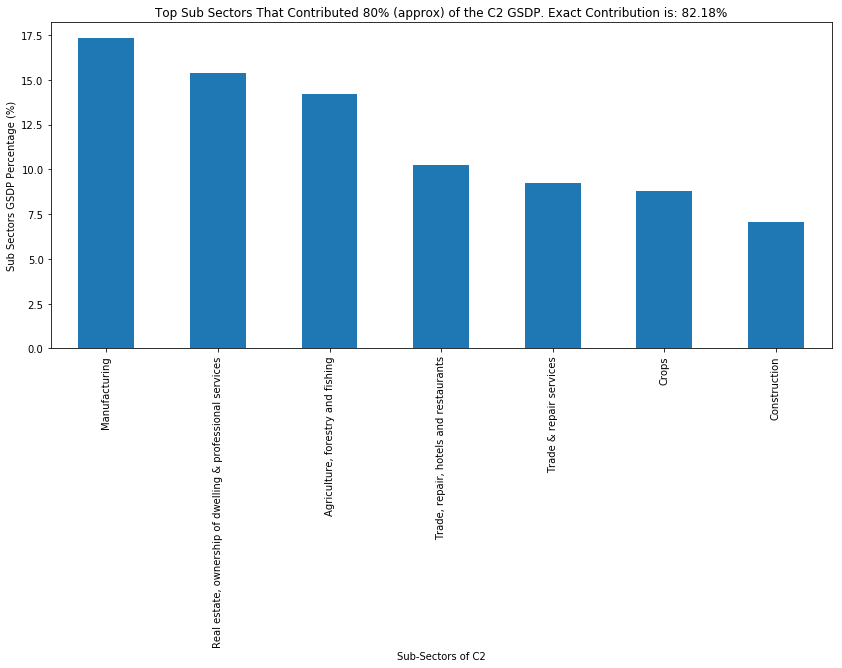

In [84]:
plt.figure(figsize=(14,6))

# Selecting the required rows and columns using: iloc[:-1,:]['%_of_GSDP_Contribution'] and plotting the graph using: plot(kind='bar')

C2_Sub_Sectors_contributes_80_percent_apprx.set_index("C2_Sub_Sectors_that_contributes_80%_approximately_to_GSDP_in_Total").iloc[:-1,:]['%_of_GSDP_Contribution'].plot(kind='bar')

plt.ylabel('Sub Sectors GSDP Percentage (%)');plt.xlabel('Sub-Sectors of C2')

plt.title('Top Sub Sectors That Contributed 80% (approx) of the C2 GSDP. Exact Contribution is: {0}%'.format(C2_Sub_Sectors_contributes_80_percent_apprx.iloc[-1:,-1:].values[0][0]))

plt.show()


In [85]:
# Get all the fields that belong to the c3 states

df_C3 = df_all_states.loc[df_all_states.State.isin(c3.State)&(df_all_states['S.No.']!='Total')&
        (~df_all_states['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]

# Keeping only the necessary fields and grouping and sorting as required

df_C3 = df_C3[['Item','2014-15']].groupby(by='Item').sum().sort_values(by='2014-15',ascending=False).reset_index()

# Creating a new column Percentage_of_GSDP for easy analysis

df_C3['%_of_GSDP_Contribution'] = df_C3['2014-15']/(df_C3['2014-15'][0])*100 # here index index 0 has GSDP since we have sorted in descending order

# Finding which are the Sub-sectors that contribute approximately 80% to the GSDP (It should be 3 or more)

start =1; End = 4 # Takinfg first top 3 sectors initially to check whether it contributes approximately 80%. Starting with 1 to avoid first row which is GSDP

while df_C3.iloc[start:End ,-1].sum() <= 78: #considering anything less than or equal to 78% does not contribute 80% approximately, only equal to greater than 79% does.
    End = End+1
    
# Contribution of subsectors approximately 80% For category C3 to the total GSDP are as follows

C3_Sub_Sectors_contributes_80_percent_apprx = df_C3[['Item','%_of_GSDP_Contribution']].iloc[start:End].append({'Item':'ABOVE C3 SUB-SECTORS EXACT CONTRIBUTION =','%_of_GSDP_Contribution':round(df_C3.iloc[start:End ,-1].sum(),2)},ignore_index=True).rename(columns={'Item':'C3_Sub_Sectors_that_contributes_80%_approximately_to_GSDP_in_Total'})

C3_Sub_Sectors_contributes_80_percent_apprx


,C3_Sub_Sectors_that_contributes_80%_approximately_to_GSDP_in_Total,%_of_GSDP_Contribution
0,"Agriculture, forestry and fishing",24.640596
1,Crops,16.315396
2,Manufacturing,12.327485
3,"Trade, repair, hotels and restaurants",10.492236
4,Trade & repair services,9.859832
5,Construction,8.842803
6,ABOVE C3 SUB-SECTORS EXACT CONTRIBUTION =,82.480000


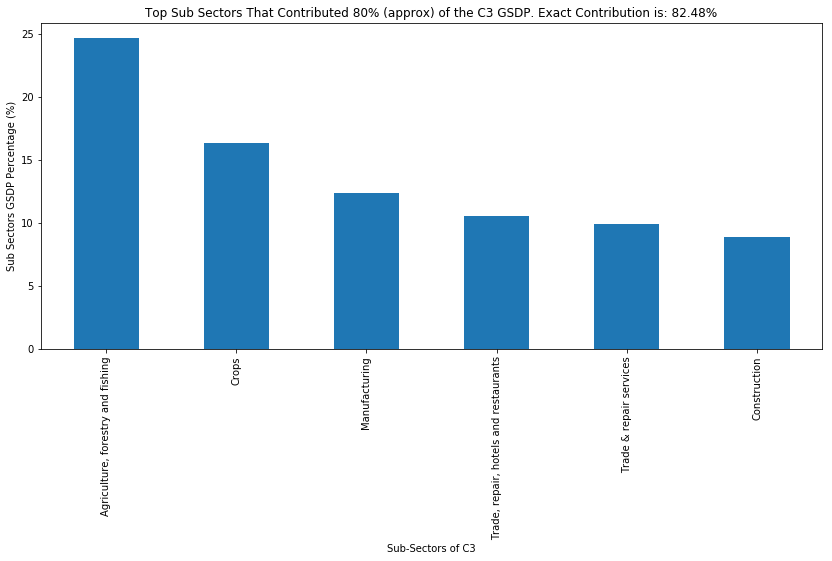

In [86]:
plt.figure(figsize=(14,6))

# Selecting the required rows and columns using: iloc[:-1,:]['%_of_GSDP_Contribution'] and plotting the graph using: plot(kind='bar')

C3_Sub_Sectors_contributes_80_percent_apprx.set_index("C3_Sub_Sectors_that_contributes_80%_approximately_to_GSDP_in_Total").iloc[:-1,:]['%_of_GSDP_Contribution'].plot(kind='bar')

plt.ylabel('Sub Sectors GSDP Percentage (%)'); plt.xlabel('Sub-Sectors of C3')

plt.title('Top Sub Sectors That Contributed 80% (approx) of the C3 GSDP. Exact Contribution is: {0}%'.format(C3_Sub_Sectors_contributes_80_percent_apprx.iloc[-1:,-1:].values[0][0]))

plt.show()


In [87]:
# Get all the fields that belong to the c4 states

df_C4 = df_all_states.loc[df_all_states.State.isin(c4.State)&(df_all_states['S.No.']!='Total')&
        (~df_all_states['Item'].isin(['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)']))]

# Keeping only the necessary fields and grouping and sorting as required

df_C4 = df_C4[['Item','2014-15']].groupby(by='Item').sum().sort_values(by='2014-15',ascending=False).reset_index()

# Creating a new column Percentage_of_GSDP for easy analysis

df_C4['%_of_GSDP_Contribution'] = df_C4['2014-15']/(df_C4['2014-15'][0])*100 # here index index 0 has GSDP since we have sorted in descending order

# Finding which are the Sub-sectors that contribute approximately 80% to the GSDP (It should be 3 or more)

start =1; End = 4 # Takinfg first top 3 sectors initially to check whether it contributes approximately 80%. Starting with 1 to avoid first row which is GSDP

while df_C4.iloc[start:End ,-1].sum() <= 78: #considering anything less than or equal to 78% does not contribute 80% approximately, only equal to greater than 79% does.
    End = End+1
    
# Contribution of subsectors approximately 80% For category C4 to the total GSDP are as follows

C4_Sub_Sectors_contributes_80_percent_apprx = df_C4[['Item','%_of_GSDP_Contribution']].iloc[start:End].append({'Item':'ABOVE C4 SUB-SECTORS EXACT CONTRIBUTION =','%_of_GSDP_Contribution':round(df_C4.iloc[start:End ,-1].sum(),2)},ignore_index=True).rename(columns={'Item':'C4_Sub_Sectors_that_contributes_80%_approximately_to_GSDP_in_Total'})

C4_Sub_Sectors_contributes_80_percent_apprx


,C4_Sub_Sectors_that_contributes_80%_approximately_to_GSDP_in_Total,%_of_GSDP_Contribution
0,"Agriculture, forestry and fishing",21.885190
1,Crops,14.112128
2,"Trade, repair, hotels and restaurants",11.957100
3,"Real estate, ownership of dwelling & professio...",11.627645
4,Manufacturing,11.141726
5,Trade & repair services,11.092776
6,ABOVE C4 SUB-SECTORS EXACT CONTRIBUTION =,81.820000


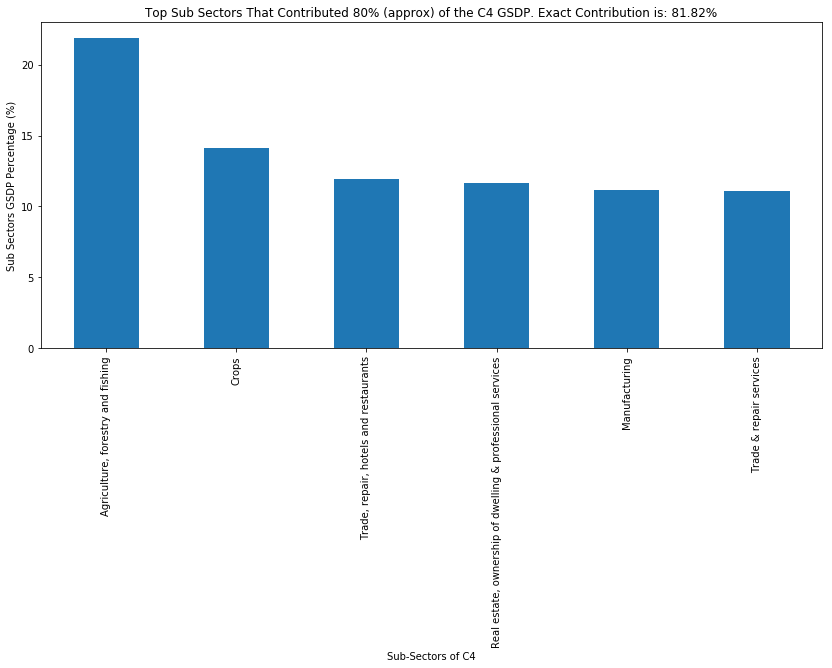

In [88]:
plt.figure(figsize=(14,6))

# Selecting the required rows and columns using: iloc[:-1,:]['%_of_GSDP_Contribution'] and plotting the graph using: plot(kind='bar')

C4_Sub_Sectors_contributes_80_percent_apprx.set_index("C4_Sub_Sectors_that_contributes_80%_approximately_to_GSDP_in_Total").iloc[:-1,:]['%_of_GSDP_Contribution'].plot(kind='bar')

plt.ylabel('Sub Sectors GSDP Percentage (%)'); plt.xlabel('Sub-Sectors of C4')

plt.title('Top Sub Sectors That Contributed 80% (approx) of the C4 GSDP. Exact Contribution is: {0}%'.format(C4_Sub_Sectors_contributes_80_percent_apprx.iloc[-1:,-1:].values[0][0]))

plt.show()


In [89]:
#Summarising and getting the insight:
#How does the GDP distribution of the top states (C1) differ from the others?

In [90]:
print('AVG of C1 GSDP: ',round(int(df_C1.iloc[0,1])/c1.shape[0]),', Per-capita AVG of C1 :', round(c1['per_capita_GSDP'].mean()))

print('AVG of C2 GSDP: ',round(int(df_C2.iloc[0,1])/c2.shape[0]),', Per-capita AVG of C2 :', round(c2['per_capita_GSDP'].mean()))

print('AVG of C3 GSDP: ',round(int(df_C3.iloc[0,1])/c3.shape[0]),', Per-capita AVG of C3 :', round(c3['per_capita_GSDP'].mean()))

print('AVG of C4 GSDP: ',round(int(df_C4.iloc[0,1])/c4.shape[0]),', Per-capita AVG of C4 :', round(c4['per_capita_GSDP'].mean()))

AVG of C1 GSDP:  28516475 , Per-capita AVG of C1 : 178051
AVG of C2 GSDP:  69203196 , Per-capita AVG of C2 : 135158
AVG of C3 GSDP:  20395351 , Per-capita AVG of C3 : 80598
AVG of C4 GSDP:  37010779 , Per-capita AVG of C4 : 52912


In [91]:
#From the above output we could clearly see that comparing to C1 average GSDP other categories average are Approximately 2 to 3 times (C4, C2) larger or equal (C3)
#We are taking the average GSDP here because the count of the states in each category is not the same.

In [92]:
#Which sub-sectors seem to be correlated with high GDP?

In [93]:
df_all_states[['Item','2014-15']].groupby('Item').sum().sort_values(by = '2014-15', ascending=False).head(11)

,2014-15
Item,
Gross State Domestic Product,1.109570e+09
TOTAL GSVA at basic prices,1.017533e+09
Tertiary,5.120570e+08
Secondary,2.873981e+08
Primary,2.180776e+08
"Agriculture, forestry and fishing",1.901495e+08
Manufacturing,1.708739e+08
"Real estate, ownership of dwelling & professional services",1.486034e+08
Taxes on Products,1.224867e+08


In [94]:
#From the above groupby chart (based on all state GSDP) we could see that the sub-sectors (max GDP contributors) that are correlated to high GDP are:

   # 1. Agri,forestry, fishing  
   # 2. Manufacturing  
   # 3. real estate..  
   # 4. Trade, repair, hotels..  

In [95]:
#Which sub-sectors do the various categories need to focus on?

In [96]:
# Sub-sectors that needs to be concentrated are the one's that are contributing lowest to the GSDP.

print('Sub-sectors to be concentrated for C1: ',df_C1['Item'].tail().values,'\n') 

print('Sub-sectors to be concentrated for C2: ',df_C2['Item'].tail().values, '\n')

print('Sub-sectors to be concentrated for C3: ',df_C3['Item'].tail().values, '\n')

print('Sub-sectors to be concentrated for C4: ',df_C4['Item'].tail().values, '\n')

# Note: Sub-sectors in the dataframes df_C1,df_C2,df_C3,df_C4 is already aranged in descending order based on GSDP contribution 


Sub-sectors to be concentrated for C1:  ['Road transport*' 'Services incidental to transport' 'Air transport'
 'Water transport' 'Storage'] 

Sub-sectors to be concentrated for C2:  ['Railways' 'Services incidental to transport' 'Air transport'
 'Water transport' 'Storage'] 

Sub-sectors to be concentrated for C3:  ['Services incidental to transport' 'Air transport'
 'Services incidental to transport*' 'Storage' 'Water transport'] 

Sub-sectors to be concentrated for C4:  ['Hotels & restaurants' 'Services incidental to transport' 'Storage'
 'Air transport' 'Water transport'] 



In [97]:
#As shown above, even the sub-sectors which are very huge is also contributiong less. example: transportation (railways, water-transport, road transport, Air transport). One main reason for the very high potential sub-sectors contributing less to GSDP is because of the heavy loss that is happening in these sub-sectors which needs to be facused and arrested immediately. (loss can be of any reasons which needs to be investigated).

In [98]:
#For each of the categories, as mentioned in the question 3 above, we need to concentrate on the sub-sectors which are having very high poetential (example transporation) and are contributing very less to GSDP. 
#Focus on Primary (having high potential) which are contributing less to GDP, in understanding the losses happening in these sectors and arresting them to increase its GDP contribution
#Focusing on Tertiary which are proven to have very high profits, to take it to the next level in boosting its profit.

In [99]:
#Part-II: GDP and Education Drop-out Rates

In [100]:
#Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for the states. Choose an appropriate plot to conduct this analysis.

In [103]:
df_drp_out = pd.read_csv('Data 2 dropout rates.csv')
df_drp_out.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [104]:
# As seen above there are two similar columns "Primary - 2014-2015","Primary - 2014-2015.1" 
# This is because both these columns have same name in the given data set. 
# So changing the names of columns accordingly as: 'Primary - 2013-2014' and 'Primary - 2014-2015'
# We are alos changing the column name: "Level of Education - State" as "State" for convenience. 

df_drp_out = df_drp_out.rename(columns = {'Primary - 2014-2015':'Primary - 2013-2014','Primary - 2014-2015.1':'Primary - 2014-2015','Level of Education - State':'State'})
df_drp_out

,Sl. No.,State,Primary - 2012-2013,Primary - 2013-2014,Primary - 2014-2015,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.870,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.710,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.110,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.060,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.900,NaN,NaN,NaN
5,6,Chandigarh,NaN,NaN,NaN,0.10,1.08,0.44,NaN,NaN,NaN,13.65,11.28,10.55
6,7,Chhatisgarh,4.14,1.42,2.91,5.42,3.80,5.85,14.86,23.41,21.260,NaN,NaN,2.76
7,8,Dadra & Nagar Haveli,NaN,1.57,1.47,3.38,4.13,4.02,24.41,28.59,16.770,9.65,6.24,9.47
8,9,Daman & Diu,NaN,0.85,1.11,NaN,3.58,3.11,11.52,19.86,32.270,1.26,9.86,40.48
9,10,Delhi,NaN,NaN,NaN,NaN,2.78,0.76,5.32,8.90,11.810,14.47,16.25,17.32


In [105]:
# considering only for the year 2014-15 and for the class: primary, upper primary and secondary, as requested.

df_drp_out = df_drp_out[['State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]

df_drp_out.head()

,State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,0.51,1.69,9.87
1,Andhra Pradesh,6.72,5.20,15.71
2,Arunachal Pradesh,10.82,6.71,17.11
3,Assam,15.36,10.51,27.06
4,Bihar,NaN,4.08,25.90


In [106]:
# Dropping the states that are having null values. Here we are not using fillna command to fill the mean, median or mode because there is a hude difference between the dropout rates between each states. 

df_drp_out = df_drp_out.dropna(how='any')

df_drp_out

,State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,0.51,1.69,9.87
1,Andhra Pradesh,6.72,5.20,15.71
2,Arunachal Pradesh,10.82,6.71,17.11
3,Assam,15.36,10.51,27.06
6,Chhatisgarh,2.91,5.85,21.26
7,Dadra & Nagar Haveli,1.47,4.02,16.77
8,Daman & Diu,1.11,3.11,32.27
10,Goa,0.73,0.07,11.15
11,Gujarat,0.89,6.41,25.04
12,Haryana,5.61,5.81,15.89


In [107]:
# In above States other than union territories and the deleted states that had Null Values we have two states with wrong name (Uttrakhand and Chhatisgarh)
# We are going to correct the names to Uttarakhand and Chhattisgarh. If not while merging the columns with the part-1 df which had per-capita values, we will miss these 2 rows.

df_drp_out = df_drp_out.replace(['Chhatisgarh','Uttrakhand'],['Chhattisgarh','Uttarakhand'])

df_drp_out

,State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,0.51,1.69,9.87
1,Andhra Pradesh,6.72,5.20,15.71
2,Arunachal Pradesh,10.82,6.71,17.11
3,Assam,15.36,10.51,27.06
6,Chhattisgarh,2.91,5.85,21.26
7,Dadra & Nagar Haveli,1.47,4.02,16.77
8,Daman & Diu,1.11,3.11,32.27
10,Goa,0.73,0.07,11.15
11,Gujarat,0.89,6.41,25.04
12,Haryana,5.61,5.81,15.89


In [108]:
# Merging two dataframes to get the per-capita-GSDP and the dropout rate in the same frame.

df_drpout_percap = pd.merge(df_all_states[df_all_states.Item=='Per Capita GSDP (Rs.)'], df_drp_out, how = 'inner', on = 'State')

df_drpout_percap

,S.No.,Item,2014-15,State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,17,Per Capita GSDP (Rs.),104977.0,Andhra Pradesh,6.72,5.20,15.71
1,17,Per Capita GSDP (Rs.),112718.0,Arunachal Pradesh,10.82,6.71,17.11
2,17,Per Capita GSDP (Rs.),60621.0,Assam,15.36,10.51,27.06
3,17,Per Capita GSDP (Rs.),86860.0,Chhattisgarh,2.91,5.85,21.26
4,17,Per Capita GSDP (Rs.),271793.0,Goa,0.73,0.07,11.15
5,17,Per Capita GSDP (Rs.),141263.0,Gujarat,0.89,6.41,25.04
6,17,Per Capita GSDP (Rs.),164077.0,Haryana,5.61,5.81,15.89
7,17,Per Capita GSDP (Rs.),147330.0,Himachal Pradesh,0.64,0.87,6.07
8,17,Per Capita GSDP (Rs.),62091.0,Jharkhand,5.48,8.99,24.00
9,17,Per Capita GSDP (Rs.),145141.0,Karnataka,2.02,3.85,26.18


In [109]:
# Adding a new column in above df: 'Total_dropout_in_2014-15'

df_drpout_percap['Total_dropout_in_2014-15'] = df_drpout_percap.iloc[:,-3:].sum(axis = 1)

df_drpout_percap

,S.No.,Item,2014-15,State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Total_dropout_in_2014-15
0,17,Per Capita GSDP (Rs.),104977.0,Andhra Pradesh,6.72,5.20,15.71,27.63
1,17,Per Capita GSDP (Rs.),112718.0,Arunachal Pradesh,10.82,6.71,17.11,34.64
2,17,Per Capita GSDP (Rs.),60621.0,Assam,15.36,10.51,27.06,52.93
3,17,Per Capita GSDP (Rs.),86860.0,Chhattisgarh,2.91,5.85,21.26,30.02
4,17,Per Capita GSDP (Rs.),271793.0,Goa,0.73,0.07,11.15,11.95
5,17,Per Capita GSDP (Rs.),141263.0,Gujarat,0.89,6.41,25.04,32.34
6,17,Per Capita GSDP (Rs.),164077.0,Haryana,5.61,5.81,15.89,27.31
7,17,Per Capita GSDP (Rs.),147330.0,Himachal Pradesh,0.64,0.87,6.07,7.58
8,17,Per Capita GSDP (Rs.),62091.0,Jharkhand,5.48,8.99,24.00,38.47
9,17,Per Capita GSDP (Rs.),145141.0,Karnataka,2.02,3.85,26.18,32.05


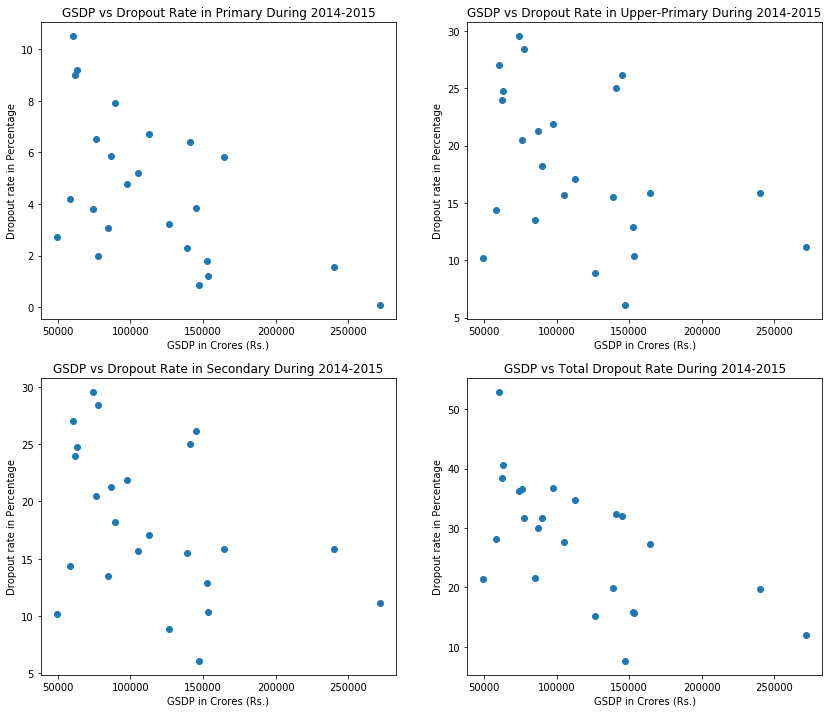

In [110]:
# Plotting

x = df_drpout_percap['2014-15'].values # per-capita GSDP

y1 = df_drpout_percap['Primary - 2014-2015'].values # primary dropout

y2 = df_drpout_percap['Upper Primary - 2014-2015'].values # upper primary dropout

y3 = df_drpout_percap['Secondary - 2014-2015'].values # Secondary dropout

y4 = df_drpout_percap['Total_dropout_in_2014-15'].values # Total_dropout_in_2014-15

plt.figure(figsize=(14,12))

plt.subplot(221)

plt.title('GSDP vs Dropout Rate in Primary During 2014-2015')

plt.xlabel('GSDP in Crores (Rs.)')

plt.ylabel('Dropout rate in Percentage')

plt.scatter(x,y2)

plt.subplot(222)

plt.title('GSDP vs Dropout Rate in Upper-Primary During 2014-2015')

plt.xlabel('GSDP in Crores (Rs.)')

plt.ylabel('Dropout rate in Percentage')

plt.scatter(x,y3)

plt.subplot(223)

plt.title('GSDP vs Dropout Rate in Secondary During 2014-2015')

plt.xlabel('GSDP in Crores (Rs.)')

plt.ylabel('Dropout rate in Percentage')

plt.scatter(x,y3)

plt.subplot(224)

plt.title('GSDP vs Total Dropout Rate During 2014-2015')

plt.xlabel('GSDP in Crores (Rs.)')

plt.ylabel('Dropout rate in Percentage')

plt.scatter(x,y4)

plt.show()
